In [1]:
from contrastive import CPCA
import pandas as pd
#The Samples seem to be here

#Note from Ban:
# I’ve used Baseline Samples as the background dataset, 
# with Contrastive PCA we see better separation between Antibiotic 
    # Samples and Outside_Farm Samples. Note that baseline samples are 
    # clustered together in the bottom right corner (at the center 
    # of Outside_Farm Samples).One way to think about  Contrastive PCA (cPCA) 
# is that it “identifies the direction that has a higher variance 
# in the target data [(all samples in the results below)] 
# as compared to the background data [(Baseline Samples)].”
# In some sense cPCA allows us to look at Antibiotic and Outside_Farm Samples 
# excluding patterns that are common with Baseline Samples.


#Run this analysis with outliers removed



def read_data(filepath, sep):

    df = pd.read_csv(filepath, sep = sep, index_col = 0)
    print(df)
    return df

filepath = 'milk-real-samples-decontam-RPM-supported-microbes-only_from_DS10828562.txt'
df = read_data(filepath, '\t')

                             Baseline_1_2018.09.05  Baseline_10_2018.09.14  \
Genus_Name                                                                   
Achromobacter                             0.070726                0.158397   
Acidipropionibacterium                    0.551659                0.105598   
Acidovorax                                0.297047                0.246395   
Acinetobacter                            18.883719               67.934705   
Actinomyces                               0.763836                1.355174   
...                                            ...                     ...   
Deferribacter                             0.014145                0.017600   
Spirochaeta                               0.014145                0.017600   
Taylorella                                0.014145                0.017600   
Candidatus Nitrosopelagicus               0.014145                0.017600   
Desulfobacterium                          0.014145              

Baseline_13_2018.09.17
Baseline_16_2018.09.20
Baseline_4_2018.09.08
Baseline_8_2018.09.12
OutsideFarm_13_2018.10.07
OutsideFarm_9_2018.09.28
Data loaded and preprocessed
Covariance matrices computed


/Users/akshayagarwal/Desktop/python3env/genomics/python3.9_env/lib/python3.9/site-packages/matplotlib/collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


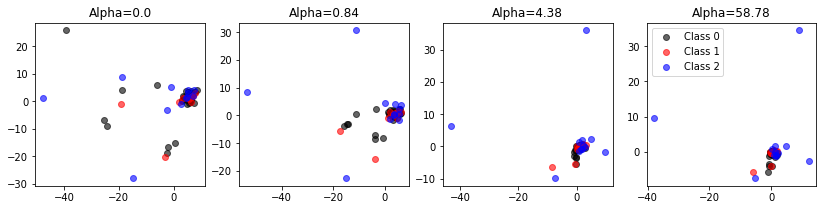

In [6]:
def prep_data(df):
    #separate baseline fields into a new dataframe
    #original dataframe remain same

    list_columns = df.columns.to_list()
#     print(list_columns)
    list_columns_baseline = [x for x in list_columns if 'Baseline' in x]
    
    #This following loops remove outliers
    for item in list_columns_baseline:
        for item1 in ['4','8','13','16']:
            if f'_{item1}_' in item:
                print(item)
                list_columns_baseline.remove(item)
    
    for item in list_columns:
        for item1 in ['9','13']:
            if 'OutsideFarm' in item and f'_{item1}_' in item:
                print(item)
                list_columns.remove(item)

    df = df[list_columns]
    df_background = df[list_columns_baseline]

    return df_background.T, df.T

def model(df_background, df_foreground):
#     print(df_background.shape)
#     print(df_foreground.shape)
#     if df_background.shape[1] == df_foreground.shape[1]:
#         print("True")
    mdl = CPCA(n_components=2, verbose=True)
    labels = []
    for index,row in df_foreground.iterrows():
        if 'TxAntibiotic' in index:
            labels.append(8)
        elif 'OutsideFarm' in index:
            labels.append(4)
        elif 'Baseline' in index:
            labels.append(2)
#         else:
#             labels.append(1)
    projected_data = mdl.fit_transform(df_foreground, df_background, plot = True, active_labels = labels, legend = ['TxAntibiotic', 'OutsideFarm', 'Baseline'])
    
df_background, df_foreground = prep_data(df)
model(df_background, df_foreground)
